In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [2]:
data = pd.read_csv("ALLFLOWMETER_HIKARI2021.csv")


y = data['Label']

x_data = data.drop(['Label', 'Unnamed: 0.1', 'Unnamed: 0', 'uid', 'originh', 'responh', 'traffic_category'], axis=1)


In [3]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555278 entries, 0 to 555277
Data columns (total 81 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   originp                   555278 non-null  int64  
 1   responp                   555278 non-null  int64  
 2   flow_duration             555278 non-null  float64
 3   fwd_pkts_tot              555278 non-null  int64  
 4   bwd_pkts_tot              555278 non-null  int64  
 5   fwd_data_pkts_tot         555278 non-null  int64  
 6   bwd_data_pkts_tot         555278 non-null  int64  
 7   fwd_pkts_per_sec          555278 non-null  float64
 8   bwd_pkts_per_sec          555278 non-null  float64
 9   flow_pkts_per_sec         555278 non-null  float64
 10  down_up_ratio             555278 non-null  float64
 11  fwd_header_size_tot       555278 non-null  int64  
 12  fwd_header_size_min       555278 non-null  int64  
 13  fwd_header_size_max       555278 non-null  i

In [4]:
# augment = pd.DataFrame([0 if each == "Benign" or each == "Background" else 1 for each in data["traffic_category"]])
# augment.value_counts()

In [5]:
# x_augmented = pd.concat([x_data, augment], axis=1)

In [6]:
# x_augmented.info()

In [7]:
#%% min-max scaler 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(x_data)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled,y,test_size = 0.3,random_state=42)

In [9]:
x_train.shape

(388694, 81)

In [10]:
x_test.shape

(166584, 81)

In [11]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error

In [12]:
input_line = Input(shape=(81,))
encoded = Dense(32, activation='relu')(input_line)
encoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(81, activation='sigmoid')(decoded)
autoencoder = Model(input_line, decoded)
autoencoder.compile(optimizer='rmsprop', loss='binary_crossentropy')

hist = autoencoder.fit(x_train, x_train, epochs=150, batch_size=32, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/150
12147/12147 [==============================] - 14s 1ms/step - loss: 0.0673 - val_loss: 0.0637
Epoch 2/150
12147/12147 [==============================] - 14s 1ms/step - loss: 0.0636 - val_loss: 0.0636
Epoch 3/150
12147/12147 [==============================] - 12s 980us/step - loss: 0.0635 - val_loss: 0.0635
Epoch 4/150
12147/12147 [==============================] - 12s 984us/step - loss: 0.0634 - val_loss: 0.0634
Epoch 5/150
12147/12147 [==============================] - 12s 995us/step - loss: 0.0634 - val_loss: 0.0634
Epoch 6/150
12147/12147 [==============================] - 13s 1ms/step - loss: 0.0634 - val_loss: 0.0635
Epoch 7/150
12147/12147 [==============================] - 13s 1ms/step - loss: 0.0634 - val_loss: 0.0634
Epoch 8/150
12147/12147 [==============================] - 13s 1ms/step - loss: 0.0634 - val_loss: 0.0634
Epoch 9/150
12147/12147 [==============================] - 14s 1ms/step - loss: 0.0634 - val_loss: 0.0634
Epoch 10/150
12147/12147 [==============

12147/12147 [==============================] - 12s 974us/step - loss: 0.0634 - val_loss: 0.0634
Epoch 78/150
12147/12147 [==============================] - 12s 1ms/step - loss: 0.0635 - val_loss: 0.0634
Epoch 79/150
12147/12147 [==============================] - 12s 1ms/step - loss: 0.0634 - val_loss: 0.0634
Epoch 80/150
12147/12147 [==============================] - 12s 1ms/step - loss: 0.0634 - val_loss: 0.0634
Epoch 81/150
12147/12147 [==============================] - 12s 962us/step - loss: 0.0634 - val_loss: 0.0634
Epoch 82/150
12147/12147 [==============================] - 12s 973us/step - loss: 0.0634 - val_loss: 0.0634
Epoch 83/150
12147/12147 [==============================] - 11s 931us/step - loss: 0.0634 - val_loss: 0.0635
Epoch 84/150
12147/12147 [==============================] - 12s 975us/step - loss: 0.0635 - val_loss: 0.0634
Epoch 85/150
12147/12147 [==============================] - 12s 965us/step - loss: 0.0635 - val_loss: 0.0635
Epoch 86/150
12147/12147 [============

dict_keys(['loss', 'val_loss'])


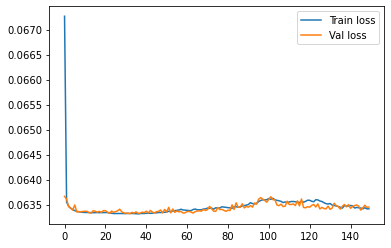

In [13]:
#%% evaluation
print(hist.history.keys())

plt.plot(hist.history["loss"],label = "Train loss")
plt.plot(hist.history["val_loss"],label = "Val loss")

plt.legend()
plt.show()

In [14]:
x_test_encoded = autoencoder.predict(x_test)
x_train_encoded = autoencoder.predict(x_train)

12147/12147 [==============================] - 6s 524us/step


B:\anaconda\envs\datai\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[154781    472]
 [ 11298     33]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96    155253
           1       0.07      0.00      0.01     11331

    accuracy                           0.93    166584
   macro avg       0.50      0.50      0.48    166584
weighted avg       0.87      0.93      0.90    166584



<AxesSubplot:>

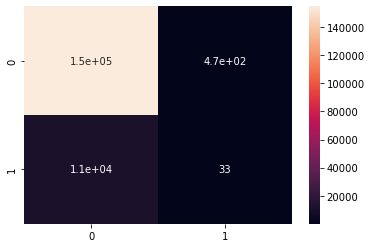

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred_lr = lr.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, pred_lr))
print(classification_report(y_test, pred_lr))
sns.heatmap(confusion_matrix(y_test, pred_lr), annot=True)

B:\anaconda\envs\datai\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[154799    454]
 [ 11315     16]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96    155253
           1       0.03      0.00      0.00     11331

    accuracy                           0.93    166584
   macro avg       0.48      0.50      0.48    166584
weighted avg       0.87      0.93      0.90    166584



<AxesSubplot:>

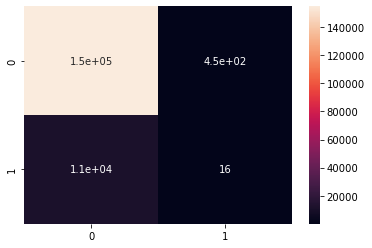

In [16]:
from sklearn.linear_model import LogisticRegression
lr_AN = LogisticRegression()
lr_AN.fit(x_train_encoded, y_train)
pred_lr = lr_AN.predict(x_test_encoded)
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, pred_lr))
print(classification_report(y_test, pred_lr))
sns.heatmap(confusion_matrix(y_test, pred_lr), annot=True)

In [17]:
x_train.shape

(388694, 81)

5206/5206 [==============================] - 3s 639us/step
[[152533   2720]
 [  8453   2878]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96    155253
           1       0.51      0.25      0.34     11331

    accuracy                           0.93    166584
   macro avg       0.73      0.62      0.65    166584
weighted avg       0.92      0.93      0.92    166584



<AxesSubplot:>

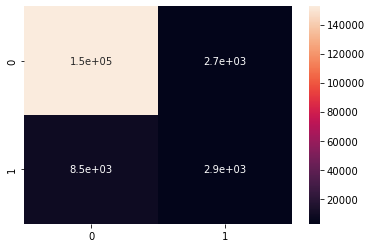

In [18]:
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(64, input_shape=(81,), activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])


history = model.fit(x_train, y_train, verbose=0, epochs=50)



pred_ann = model.predict(x_test)

pred_ann = np.where(pred_ann > 0.5, 1, 0)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, pred_ann))
print(classification_report(y_test, pred_ann))
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, pred_ann), annot=True)

5206/5206 [==============================] - 3s 601us/step
[[151493   3760]
 [  7521   3810]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96    155253
           1       0.50      0.34      0.40     11331

    accuracy                           0.93    166584
   macro avg       0.73      0.66      0.68    166584
weighted avg       0.92      0.93      0.93    166584



<AxesSubplot:>

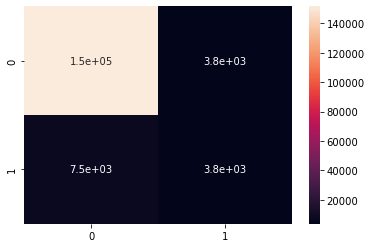

In [19]:

model_AN = Sequential()
model_AN.add(Dense(64, input_shape=(81,), activation='tanh'))
model_AN.add(Dense(64, activation='tanh'))
model_AN.add(Dense(64, activation='tanh'))
model_AN.add(Dense(64, activation='tanh'))
model_AN.add(Dense(1, activation='sigmoid'))

model_AN.compile('adam', 'binary_crossentropy', metrics=['accuracy'])


history = model_AN.fit(x_train_encoded, y_train, verbose=0, epochs=50)



pred_ann = model_AN.predict(x_test_encoded)

pred_ann = np.where(pred_ann > 0.5, 1, 0)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, pred_ann))
print(classification_report(y_test, pred_ann))
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, pred_ann), annot=True)